In [2]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist
import itertools

import sys
sys.path.append("../..")
from functools import partial

from analyzer.dumperReader.reader import *
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *
from analyzer.computations.CPToSupercls import CPToSuperclusterProperties, CPToSuperclusterProperties_fwlite, CPToSuperclusterProperties_recoSC
from analyzer.computations.tracksters import tracksters_seedProperties, CPtoTrackster_properties
from analyzer.energy_resolution.fit import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
dumperReader = {ntuple : SingleInputReaderFWLite("/grid_mnt/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v8-mustache", "/grid_mnt/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v14-dnn-Apr05_14-48/dataframes/", ntuple) for ntuple in itertools.chain(range(1, 31),range(201,231))}# 

In [8]:
res = runComputations([CPToSuperclusterProperties_fwlite, CPToSuperclusterProperties_recoSC], list(dumperReader.values()), max_workers=10, store="/grid_mnt/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v14-dnn-Apr05_14-48/final-dfs")

  0%|          | 0/60 [00:00<?, ?it/s]

In [14]:
CPtoSC_DNN_df, CPtoSC_mustache_df =  res[0], res[1]

In [16]:
h_scOverCP_DNN_energy = hist.Hist(eratio_axis(label="Supercluster energy / CaloParticle energy")).fill(CPtoSC_DNN_df.raw_energy_supercls_sum/CPtoSC_DNN_df.regressed_energy_CP)
h_scOverCP_mustache_energy = hist.Hist(eratio_axis(label="Supercluster energy / CaloParticle energy")).fill(CPtoSC_mustache_df.raw_energy_supercls_sum/CPtoSC_mustache_df.regressed_energy_CP)

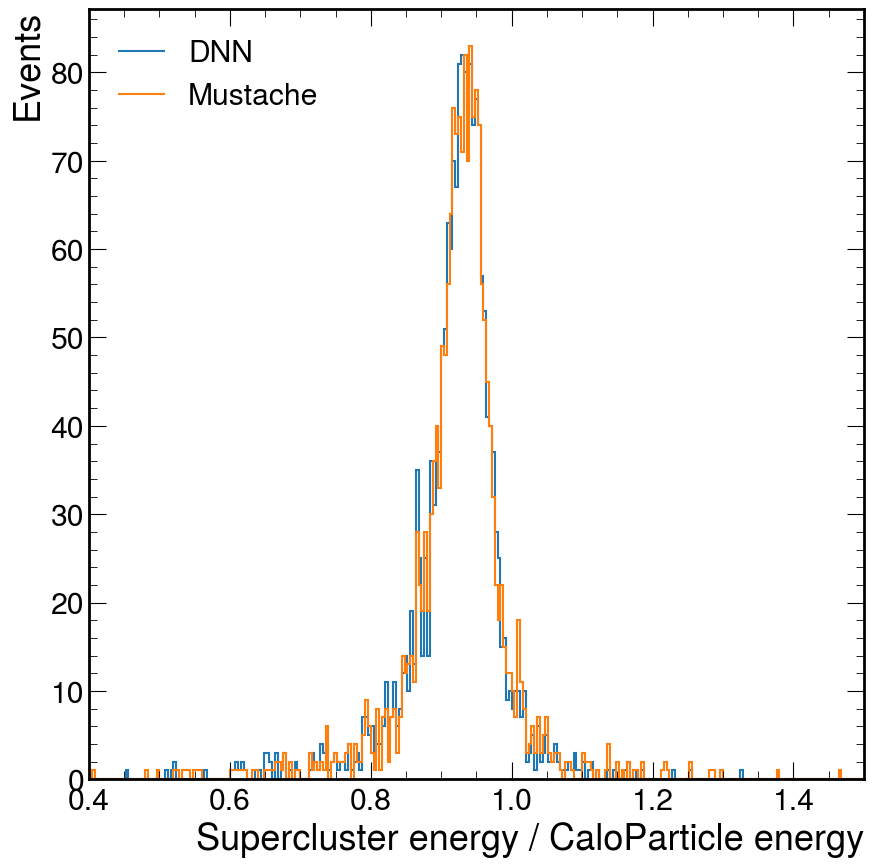

In [17]:
hep.histplot([h_scOverCP_DNN_energy, h_scOverCP_mustache_energy], label=["DNN", "Mustache"], yerr=False, flow="none")
plt.xlim(0.4, 1.5)
plt.ylabel("Events")
plt.legend(loc="upper left")

In [18]:
CPtoSC_DNN_df

supercls_id  raw_energy_seed  \
eventInternal caloparticle_id                                 
0             1                          0       200.929672   
              0                         17       228.426239   
1             1                          0       516.890320   
              0                         16       531.369995   
2             0                          0        23.194902   
...                                    ...              ...   
997           1                          2       379.686768   
998           1                          0        63.080261   
              0                         12        64.884399   
999           0                          0       147.307037   
              1                          1       167.934784   

                               raw_em_energy_seed  regressed_energy_seed  \
eventInternal caloparticle_id                                              
0             1                        200.547134             208.893906   
              0                        228.426239             242.749146   
1             1                        516.629639             539.893311   
              0                        530.946960             554.294312   
2             0                         23.194902              27.848148   
...                                           ...                    ...   
997           1                        379.195892             401.748230   
998           1                         63.080261              66.278847   
              0                         64.724670              67.826385   
999           0                        147.307037             156.492523   
              1                        167.934784             179.081039   

                               raw_pt_seed  barycenter_eta_seed  \
eventInternal caloparticle_id                                     
0             1                  39.390762             2.336010   
              0                  42.023884            -2.336827   
1             1                  87.493629             2.464795   
              0                  87.436203            -2.465089   
2             0                   6.907556            -1.801838   
...                                    ...                  ...   
997           1                  73.605904             2.303736   
998           1                   9.006367             2.641193   
              0                   8.771091            -2.641907   
999           0                  45.198627            -1.865816   
              1                  50.796539             1.865884   

                               raw_energy_supercls_sum  \
eventInternal caloparticle_id                            
0             1                             210.164322   
              0                             228.426239   
1             1                             523.075500   
              0                             531.369995   
2             0                              35.736172   
...                                                ...   
997           1                             384.410339   
998           1                              80.033783   
              0                              64.884399   
999           0                             163.900726   
              1                             174.080902   

                               raw_em_energy_supercls_sum  \
eventInternal caloparticle_id                               
0             1                                209.781784   
              0                                228.426239   
1             1                                522.814819   
              0                                530.946960   
2             0                                 35.736172   
...                                                   ...   
997           1                                383.919464   
998           1                               

In [19]:
CPtoSC_mustache_df

supercls_id  raw_energy_seed  \
eventInternal caloparticle_id                                 
0             0                          0       228.426239   
              1                          1       200.929672   
1             0                          0       531.369995   
              1                          1       516.890320   
2             1                          0        35.964340   
...                                    ...              ...   
997           0                          1       360.825134   
998           0                          0        64.884399   
              1                          1        63.080261   
999           1                          0       167.934784   
              0                          1       147.307037   

                               raw_em_energy_seed  regressed_energy_seed  \
eventInternal caloparticle_id                                              
0             0                        228.426239             242.749146   
              1                        200.547134             208.893906   
1             0                        530.946960             554.294312   
              1                        516.629639             539.893311   
2             1                         35.964340              39.395245   
...                                           ...                    ...   
997           0                        360.825134             378.416931   
998           0                         64.724670              67.826385   
              1                         63.080261              66.278847   
999           1                        167.934784             179.081039   
              0                        147.307037             156.492523   

                               raw_pt_seed  barycenter_eta_seed  \
eventInternal caloparticle_id                                     
0             0                  42.023884            -2.336827   
              1                  39.390762             2.336010   
1             0                  87.436203            -2.465089   
              1                  87.493629             2.464795   
2             1                  11.125319             1.804247   
...                                    ...                  ...   
997           0                  69.643494            -2.303545   
998           0                   8.771091            -2.641907   
              1                   9.006367             2.641193   
999           1                  50.796539             1.865884   
              0                  45.198627            -1.865816   

                               raw_energy_supercls_sum  \
eventInternal caloparticle_id                            
0             0                             228.426239   
              1                             208.896851   
1             0                             531.369995   
              1                             516.890320   
2             1                              35.964340   
...                                                ...   
997           0                             369.849579   
998           0                              64.884399   
              1                              80.033783   
999           1                             167.934784   
              0                             174.055283   

                               raw_em_energy_supercls_sum  \
eventInternal caloparticle_id                               
0             0                                228.426239   
              1                                208.514313   
1             0                                530.946960   
              1                                516.629639   
2             1                                 35.964340   
...                                                   ...   
997           0                                369.849579   
998           0                               